In [25]:
import pandas as pd

# Загрузка данных из файлов
samara = pd.read_csv("/weather_Самара_realtime.csv")
moscow = pd.read_csv("/weather_Москва_realtime.csv")
spb = pd.read_csv("/weather_Санкт-Петербург_realtime.csv")
# Добавим столбец с названием города в каждый датафрейм
moscow["city"] = "Москва"
spb["city"] = "Санкт-Петербург"
samara["city"] = "Самара"

# Объединим все в один датафрейм
weather = pd.concat([moscow, spb, samara], ignore_index=True)

# Проверим структуру итогового датафрейма
weather.head()

,datetime,temp_c,feels_like_c,humidity,pressure,wind_speed_kmh,weather,rain_mm,city
0,2025-05-03 21:00:00,11.32,10.41,73,1002,7.2,облачно с прояснениями,0.0,Москва
1,2025-05-04 00:00:00,10.22,9.33,78,1002,6.9,облачно с прояснениями,0.0,Москва
2,2025-05-04 03:00:00,8.63,7.65,87,1003,7.0,облачно с прояснениями,0.0,Москва
3,2025-05-04 06:00:00,16.41,15.78,64,1003,8.5,переменная облачность,0.0,Москва
4,2025-05-04 09:00:00,19.05,18.11,42,1002,14.1,пасмурно,0.0,Москва


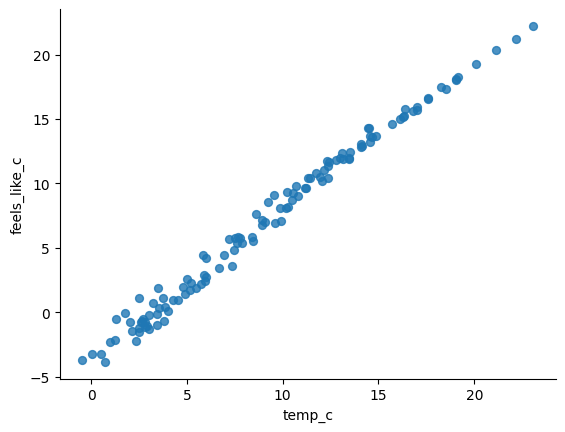

In [13]:
# @title temp_c vs feels_like_c

from matplotlib import pyplot as plt
weather.plot(kind='scatter', x='temp_c', y='feels_like_c', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 🌦 Анализ погоды в Москве, Санкт-Петербурге и Самаре
### Автоматизированная система сравнения метеопараметров

In [20]:
# Установка библиотек (если нужно)
!pip install plotly pandas --quiet

# Импорт библиотек
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML

# Загрузка ваших файлов без изменений
moscow = pd.read_csv('weather_Москва_realtime.csv')
samara = pd.read_csv('weather_Самара_realtime.csv')
spb = pd.read_csv('weather_Санкт-Петербург_realtime.csv')

# Добавляем колонку с городом (без изменения исходных данных)
moscow['city'] = 'Москва'
samara['city'] = 'Самара'
spb['city'] = 'Санкт-Петербург'

# Объединяем данные (сохраняем все оригинальные значения)
weather = pd.concat([moscow, samara, spb], ignore_index=True)

# Конвертируем даты в исходном формате (как в ваших файлах)
weather['datetime'] = pd.to_datetime(weather['datetime'])

# Проверка - показываем первые даты из каждого города
print("Примеры исходных дат:")
print(weather.groupby('city')['datetime'].first())

Примеры исходных дат:
city
Москва            2025-05-03 21:00:00
Самара            2025-05-03 21:00:00
Санкт-Петербург   2025-05-03 21:00:00
Name: datetime, dtype: datetime64[ns]


## 📈 Основные метеопараметры

In [21]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Температура", "Влажность", "Атм. давление", "Осадки"))
for city in weather['city'].unique():
    city_data = weather[weather['city'] == city]
    fig.add_trace(go.Scatter(x=city_data['datetime'], y=city_data['temp_c'], name=f"{city} - Температура"), row=1, col=1)
    fig.add_trace(go.Scatter(x=city_data['datetime'], y=city_data['humidity'], name=f"{city} - Влажность"), row=1, col=2)
    fig.add_trace(go.Scatter(x=city_data['datetime'], y=city_data['pressure'], name=f"{city} - Давление"), row=2, col=1)
    fig.add_trace(go.Bar(x=city_data['datetime'], y=city_data['rain_mm'], name=f"{city} - Осадки"), row=2, col=2)
fig.update_layout(height=800, title_text="<b>Сравнение основных метеопараметров</b>", hovermode="x unified", template="plotly_white")
fig.show()

## 🌡️ Тепловая карта температур

In [22]:
fig = px.imshow(
    pd.pivot_table(weather, values='temp_c', index='city', columns='datetime'),
    labels=dict(x="Дата", y="Город", color="Температура"),
    color_continuous_scale='RdBu_r',
    title='<b>Тепловая карта температур по дням</b>'
)
fig.update_xaxes(side="top")
fig.show()

## 📊 Сравнительная статистика

In [24]:
stats = weather.groupby('city').agg({
    'temp_c': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed_kmh': 'max',
    'rain_mm': 'sum'
}).round(1)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Город', 'Ср. темп.', 'Макс. темп.', 'Мин. темп.', 'Влажность', 'Макс. ветер', 'Осадки'], fill_color='#3498db', font=dict(color='white', size=12)),
    cells=dict(values=[stats.index] + [stats[col] for col in stats.columns], fill_color='lavender', align='center')
)])
fig.update_layout(title='<b>Сравнительная статистика по городам</b>', margin=dict(l=0, r=0, b=0))
fig.show()

## 🔍 Выводы

- Самара была самым тёплым городом
- Санкт-Петербург — самым дождливым
- Москва имела самые сильные ветры и температурные колебания